### Analysis of dataset from NIH regarding Pheochromacytomas & Paragangliomas (PCC/PGL)

##### Reviewed this data set to determine if age and/or gender have a direct relationship to size of tumors found and if any other unique factors may weigh into tumor size.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
# filter repeated warnings - allow one warning to determine if action necessary
import warnings
warnings.filterwarnings(action='once')

Clinical and genetic characteristics of PCC/PGL.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4354166/

Reviewed this data set to determine if age and gender have a direct relationship to size of tumors found and if any other unique factors may weigh into tumor size.

In [3]:
# Read data set 
df = pd.read_excel("Para_tumor_data.xlsx")
# display first 5 rows
df.head()

C:\Users\D\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\D\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,Supplementary Data 1. Clinical and genetic characteristics of analyzed PCC/PGL.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sample #,Patient #,Sex,Age at diagnosis (years),Benign/ Malignant,Tumor Location,Tumor Size (mm),Germline Mutation,Somatic Mutation,mRNA expression array,miRNA sequencing,DNA methylation array,SNP array,Whole exome sequencing,mRNA expression Cluster,miRNA expression Cluster,DNA methylation Cluster
2,1,1,F,53,B,adrenal,NaN,NaN,NaN,yes,yes,yes,yes,NaN,C2A,Mi6,M3
3,2,2,F,41,B,adrenal,45,NF1,NaN,yes,yes,yes,yes,NaN,C2A,Mi7,M3
4,3,3,M,43,B,adrenal,50,NaN,NF1,yes,yes,yes,yes,NaN,C2A,Mi5,M3


In [4]:
df.rename(columns={'Unnamed: 1': 'Patient Numb.', 'Unnamed: 2': 'Gender', 'Unnamed: 3':'Age', 'Unnamed: 4':'Benign_Malignant','Unnamed: 5':'Tumor_Location'}, inplace =True)

In [5]:
df.rename(columns={'Unnamed: 6': 'Tumor_Size_mm', 'Unnamed: 7': 'Germline_Mutation', 'Unnamed: 8':'Somatic_Mutation', 'Unnamed: 9':'mRNA_expression_array','Unnamed: 10':'miRNA_sequencing'}, inplace =True)

In [6]:
df.rename(columns={'Unnamed: 11': 'DNA_methylation_array', 'Unnamed: 12': 'SNP_array', 'Unnamed: 13':'Whole_exome_sequencing', 'Unnamed: 14':'mRNA_expression_Cluster','Unnamed: 15':'miRNA_expression_Cluster','Unnamed: 16':'DNA_methylation_Cluster'}, inplace =True)

In [7]:
df.isnull().sum()

Supplementary Data 1. Clinical and genetic characteristics of analyzed PCC/PGL.      1
Patient Numb.                                                                        1
Gender                                                                               1
Age                                                                                  3
Benign_Malignant                                                                     3
Tumor_Location                                                                       1
Tumor_Size_mm                                                                       43
Germline_Mutation                                                                  123
Somatic_Mutation                                                                   150
mRNA_expression_array                                                               15
miRNA_sequencing                                                                    31
DNA_methylation_array                      

In [8]:
df.shape

(204, 17)

In [9]:
# drop column and reassign dataframe
df = df.drop('Supplementary Data 1. Clinical and genetic characteristics of analyzed PCC/PGL.', axis=1)

In [10]:
# drop row if all values na and reassign dataframe
df = df.dropna(axis=0, how='all')

In [11]:
# locate duplicates if any
df.loc[df.duplicated()]

,Patient Numb.,Gender,Age,Benign_Malignant,Tumor_Location,Tumor_Size_mm,Germline_Mutation,Somatic_Mutation,mRNA_expression_array,miRNA_sequencing,DNA_methylation_array,SNP_array,Whole_exome_sequencing,mRNA_expression_Cluster,miRNA_expression_Cluster,DNA_methylation_Cluster
72,68,F,40,M,APG,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,C2B,NaN,NaN


In [12]:
# drop duplicate records and reassign the dataframe without the duplicates
df = df.drop_duplicates()

In [13]:
#create a function that will return 10 if female and 0 if male and create new column Gender_val
def num_score(x):
    if x=='F':
        return 10
    if x=='M':
        return 0
    
df['Gender_val'] = df['Gender'].apply(num_score)
df.head()

,Patient Numb.,Gender,Age,Benign_Malignant,Tumor_Location,Tumor_Size_mm,Germline_Mutation,Somatic_Mutation,mRNA_expression_array,miRNA_sequencing,DNA_methylation_array,SNP_array,Whole_exome_sequencing,mRNA_expression_Cluster,miRNA_expression_Cluster,DNA_methylation_Cluster,Gender_val
1,Patient #,Sex,Age at diagnosis (years),Benign/ Malignant,Tumor Location,Tumor Size (mm),Germline Mutation,Somatic Mutation,mRNA expression array,miRNA sequencing,DNA methylation array,SNP array,Whole exome sequencing,mRNA expression Cluster,miRNA expression Cluster,DNA methylation Cluster,NaN
2,1,F,53,B,adrenal,NaN,NaN,NaN,yes,yes,yes,yes,NaN,C2A,Mi6,M3,10.0
3,2,F,41,B,adrenal,45,NF1,NaN,yes,yes,yes,yes,NaN,C2A,Mi7,M3,10.0
4,3,M,43,B,adrenal,50,NaN,NF1,yes,yes,yes,yes,NaN,C2A,Mi5,M3,0.0
5,4,M,24,B,adrenal,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,C1B,Mi2,NaN,0.0


In [14]:
# remove first row/record due to column header listing twice not needed
df = df.iloc[1:,]

In [15]:
# verify the row was removed as intended
df.head()

,Patient Numb.,Gender,Age,Benign_Malignant,Tumor_Location,Tumor_Size_mm,Germline_Mutation,Somatic_Mutation,mRNA_expression_array,miRNA_sequencing,DNA_methylation_array,SNP_array,Whole_exome_sequencing,mRNA_expression_Cluster,miRNA_expression_Cluster,DNA_methylation_Cluster,Gender_val
2,1,F,53,B,adrenal,NaN,NaN,NaN,yes,yes,yes,yes,NaN,C2A,Mi6,M3,10.0
3,2,F,41,B,adrenal,45,NF1,NaN,yes,yes,yes,yes,NaN,C2A,Mi7,M3,10.0
4,3,M,43,B,adrenal,50,NaN,NF1,yes,yes,yes,yes,NaN,C2A,Mi5,M3,0.0
5,4,M,24,B,adrenal,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,C1B,Mi2,NaN,0.0
6,5,M,45,B,adrenal,NaN,NaN,VHL,yes,yes,yes,yes,NaN,C1B,Mi4,M3,0.0


In [16]:
# create a function to assign a value if tumor is Benign or Malignant and create new column Benign_Mal_score
def Beg_Mal_score(x):
    if x=='B':
        return 1
    if x=='M':
        return 0
    
df['Benign_Mal_score'] = df['Benign_Malignant'].apply(Beg_Mal_score)
df.head()

,Patient Numb.,Gender,Age,Benign_Malignant,Tumor_Location,Tumor_Size_mm,Germline_Mutation,Somatic_Mutation,mRNA_expression_array,miRNA_sequencing,DNA_methylation_array,SNP_array,Whole_exome_sequencing,mRNA_expression_Cluster,miRNA_expression_Cluster,DNA_methylation_Cluster,Gender_val,Benign_Mal_score
2,1,F,53,B,adrenal,NaN,NaN,NaN,yes,yes,yes,yes,NaN,C2A,Mi6,M3,10.0,1.0
3,2,F,41,B,adrenal,45,NF1,NaN,yes,yes,yes,yes,NaN,C2A,Mi7,M3,10.0,1.0
4,3,M,43,B,adrenal,50,NaN,NF1,yes,yes,yes,yes,NaN,C2A,Mi5,M3,0.0,1.0
5,4,M,24,B,adrenal,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,C1B,Mi2,NaN,0.0,1.0
6,5,M,45,B,adrenal,NaN,NaN,VHL,yes,yes,yes,yes,NaN,C1B,Mi4,M3,0.0,1.0


In [17]:
# verify the shape of the data
df.shape

(201, 18)

In [18]:
#replace na values with 0
df = df.fillna(0)

In [19]:
#Define bins as 0-59, 60-69, 70-79, 80-89, 90-100
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]

# Create groups for age category giving a numerical value
#Age 0-9=1, Age 10-19=2, Age 20-29=3, Age 30-39=4, Age 40-49=5, Age 50-59=6, Age 60-69=7, Age 70-100=8
group_names = [ 1, 2, 3, 4, 5, 6, 7, 8]

#make new column for Age Group
df['Age_Group'] = pd.cut(df['Age'], bins, labels=group_names)
df.head()

,Patient Numb.,Gender,Age,Benign_Malignant,Tumor_Location,Tumor_Size_mm,Germline_Mutation,Somatic_Mutation,mRNA_expression_array,miRNA_sequencing,DNA_methylation_array,SNP_array,Whole_exome_sequencing,mRNA_expression_Cluster,miRNA_expression_Cluster,DNA_methylation_Cluster,Gender_val,Benign_Mal_score,Age_Group
2,1,F,53,B,adrenal,0,0,0,yes,yes,yes,yes,0,C2A,Mi6,M3,10.0,1.0,6
3,2,F,41,B,adrenal,45,NF1,0,yes,yes,yes,yes,0,C2A,Mi7,M3,10.0,1.0,5
4,3,M,43,B,adrenal,50,0,NF1,yes,yes,yes,yes,0,C2A,Mi5,M3,0.0,1.0,5
5,4,M,24,B,adrenal,0,0,0,yes,yes,0,0,0,C1B,Mi2,0,0.0,1.0,3
6,5,M,45,B,adrenal,0,0,VHL,yes,yes,yes,yes,0,C1B,Mi4,M3,0.0,1.0,5


In [20]:
df.describe()

,Patient Numb.,Age,Tumor_Size_mm,Gender_val,Benign_Mal_score
count,201.000000,201.000000,201.000000,201.000000,201.000000
mean,93.940299,41.064677,39.203980,6.019900,0.860697
std,55.200511,16.500327,28.307829,4.907097,0.347128
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,28.000000,21.000000,0.000000,1.000000
50%,93.000000,41.000000,40.000000,10.000000,1.000000
75%,141.000000,53.000000,55.000000,10.000000,1.000000
max,190.000000,82.000000,130.000000,10.000000,1.000000


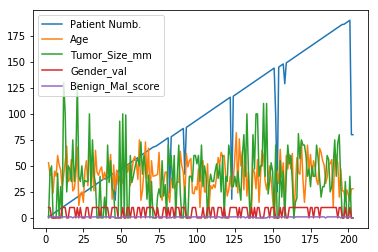

In [21]:
df.plot()

C:\Users\D\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


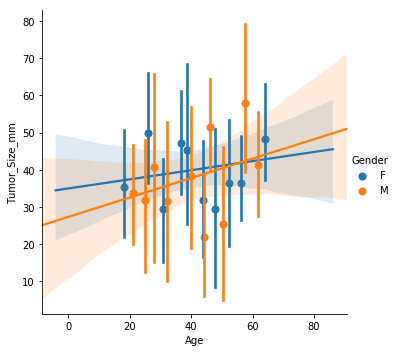

In [22]:
sns.lmplot(x='Age', y='Tumor_Size_mm', hue='Gender', x_bins=10, data=df)

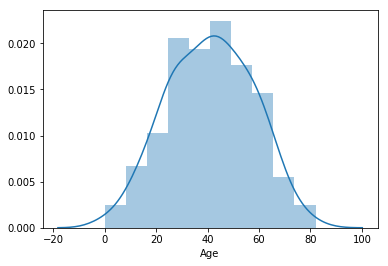

In [23]:
#create a histogram 
sns.distplot(df['Age'])

In [24]:
df['Age'].mean()

41.06467661691542

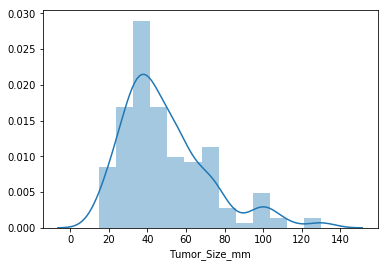

In [25]:
#create a histogram for tumor sizes > 0
df2 = df[df.Tumor_Size_mm > 0]
sns.distplot(df2['Tumor_Size_mm'])

In [26]:
df2 = df[df.Tumor_Size_mm > 0]
df2['Tumor_Size_mm'].median()

44.0

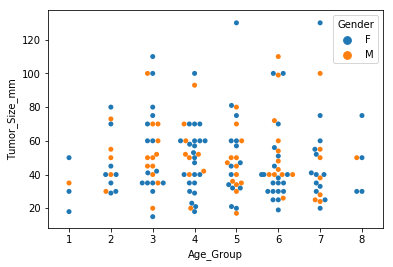

In [27]:
# swarm plot showing age groups with relationship to tumor size splitting out the differences in gender
df2 = df[df.Tumor_Size_mm > 0]
sns.swarmplot(x="Age_Group", y="Tumor_Size_mm", hue='Gender', data=df2)

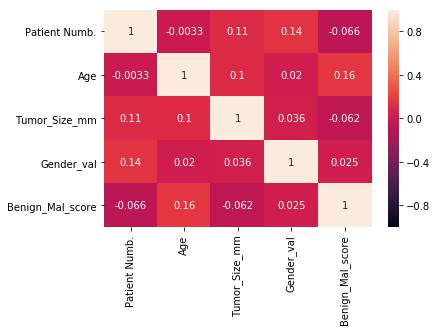

In [29]:
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

In [30]:
result = smf.ols('Tumor_Size_mm ~ Age + Gender_val + Benign_Mal_score -1', data=df).fit()

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tumor_Size_mm   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     108.8
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.19e-41
Time:                        20:39:12   Log-Likelihood:                -966.75
No. Observations:                 201   AIC:                             1939.
Df Residuals:                     198   BIC:                             1949.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.5514      0.106      5.221      0.000       0.343       0.760
Gender_val           0.8470      0.409      2.070      0.040       0.040       1.654
Benign_Mal_score    10.1166      5.041      2.007      0.046       0.175      20.058
==============================================================================
Omnibus:                        9.612   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.014
Skew:                           0.547   Prob(JB):                      0.00669
Kurtosis:                       3.021   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary conclusion of this data set based on factors pursued (Age and gender relationships with regard to tumor size)
###### Upon reviewing this dataset, it appears there is a positive relationship between the age of the patient and the size of the tumor for both Male and Females studied.
###### The Age historgram shows a normal distribution of age so the mean calculation is used to determine age most likely to discover a PCC / PGL tumor which is 41 yrs old.
###### The Tumor Size histogram shows a Poisson distribution of size so the median calculation is used to determine tumor size which is 44 mm.
###### It is therefore reasonable to conclude the PCC / PGL tumors are discovered around the age of 41 and are about 44 mm in size at time of discovery.  As age increases, the indication is the tumor will be larger.  Females are identified with these tumors more so than men.
